 # <div  style="color:#303030;font-family:'arial blACK', sans-serif,monospace; text-align: center; padding: 50px 0; vertical-align:middle;" > <img src="https://www.nicepng.com/png/full/204-2043038_white-lightbulb-icon-light-bulb-icon-white.png" style=" background:#00a0e4;border-radius:10px;width:150px;text-align:left"  /> <span style="position:relative; bottom:75px; left:20px">  Basic Primer on APIs  </span> </div>

# I. Introduction
<div style="width:100%; background:#00a0e4;font-family:'arial black',monospace; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" >  </div>


## <div style="color:#00a0e4"> 1. Background </div>


Devices (and software as well) are often prepared to receive commands or execute instructions following a pre-defined format. In many cases, they also return results with a given structure (defined by a standard or by their developers) or transmit data packets as arrangements of bits and bytes1 . To simplify the programming, an abstraction layer to these lower level underpinnings is generally provided in the form of Application Programming Interfaces (APIs). These expose the main  actions and functionalities that can be performed with a given technology in a more developer-friendly way. In this lesson we will experiment with the BITalino API for Python, as an example of how one can interact with a biomedical device in various operations modes from within a custom program.

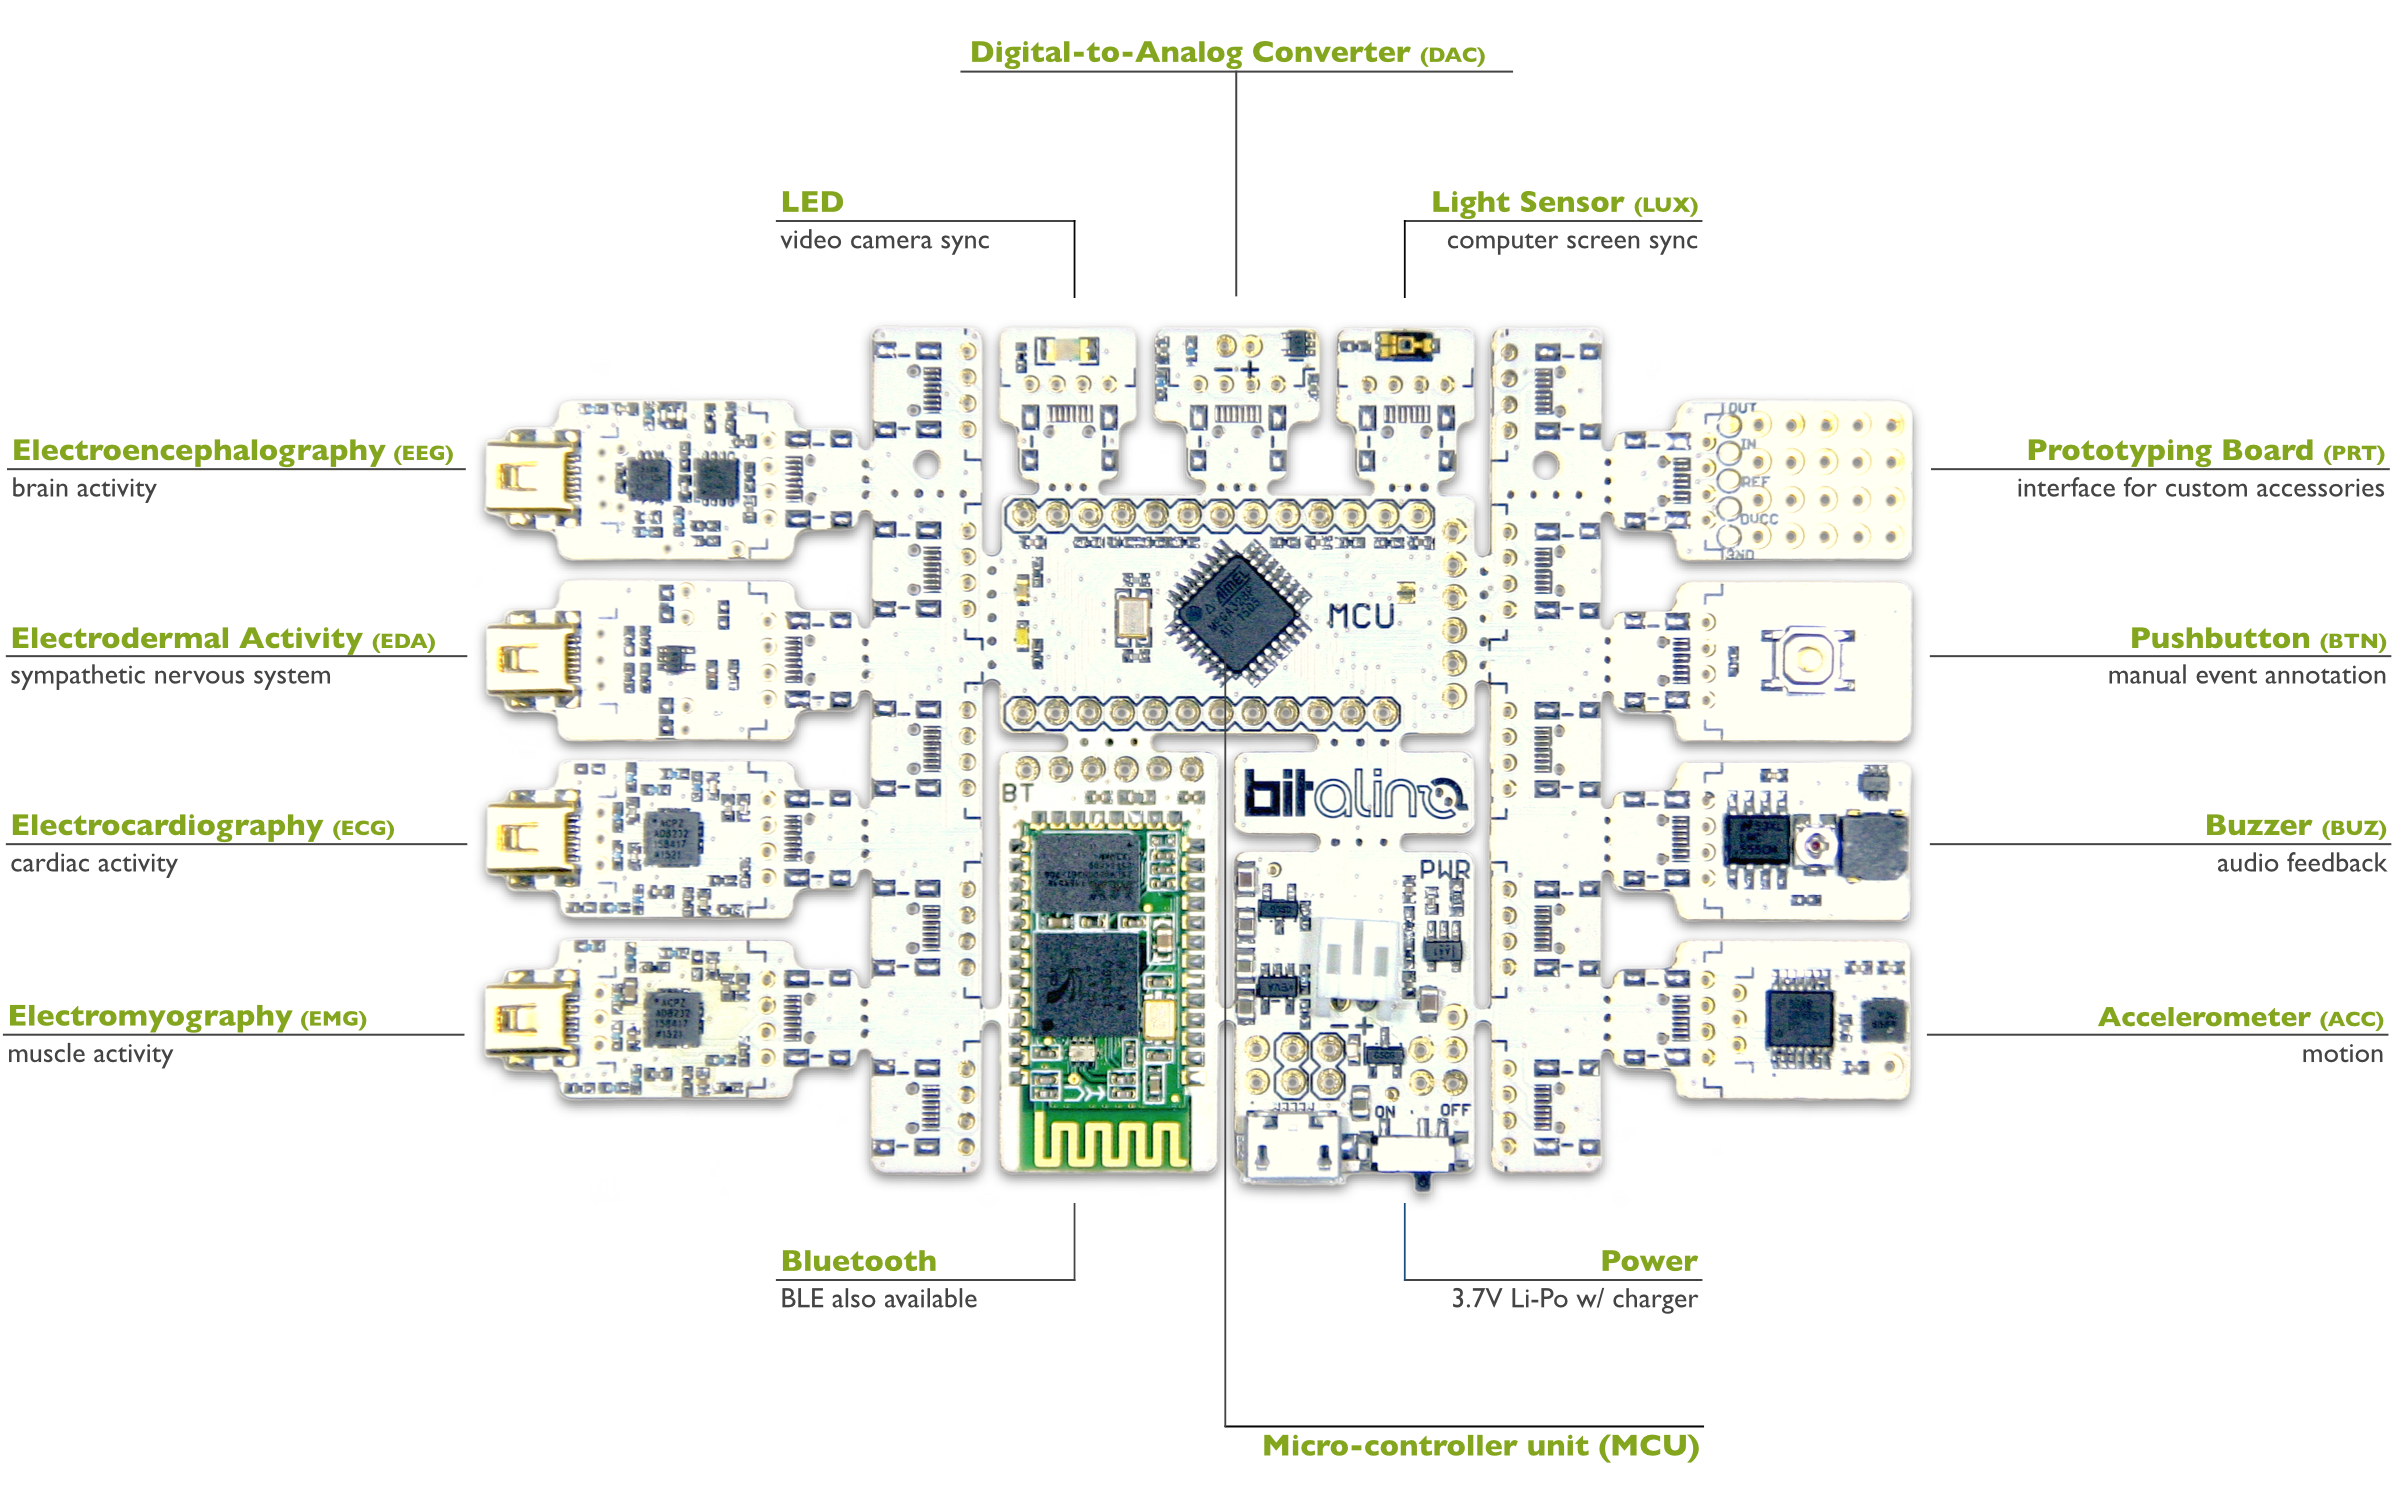

## <div style="color:#00a0e4"> 2. Objectives</div>
* Understand the structure of an Application Programming Interface (API)
* Experiment with synchronous and asynchronous data acquisition
* Create a simple real-time panic button type of system

## <div style="color:#00a0e4"> 3. Materials (optional) </div>
* Anaconda Python 2.7
* BITalino Python API
* 1x BITalino (r)evolution Board BT
* 1x 3.7V LiPo battery
* 1x Bluetooth adapter (optional)

# II. Experimental

<div style="width:100%; background:#00a0e4;color:#282828;font-family:'arial black'; text-align: center; padding: 7px 0; border-radius: 5px 50px; margin-top:-15px" > </div>

### <div style="color:#00a0e4">  1. Installing the BITalino API for Python </div>

#### <div style="color:#00a0e4">   1.1. Windows  </div>

    1. Download the BITalino API from: https://github.com/BITalinoWorld/revolution-python-api
    2. Extract the files and move the bitalino.py file to a working directory of your preference (alternatively you can add
    the containing folder to the PYTHONPATH manager on Spyder)
    3. Change the macAddress variable to match the MAC address or of your device or COM port assigned to it
    4. Open and run bitalino.py; you should see data collected by BITalino printed on the console

        Example use of the BITalino API for Python:
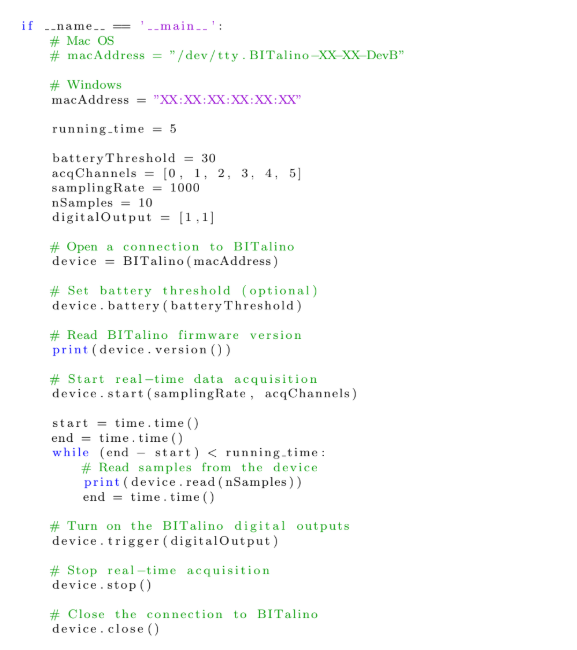

<div style="background:#fada5e;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Warning! </span> <br>
  <div style="background:#fff3c4;font-size:12px"> 
    The BITalino API for Python on Windows depends on the PyBluez
module to handle the Bluetooth connectivity. In case you are obtaining
an error associated with this, PyBluez is likely missing and you can
configure the module using the installers available at (don’t forget to
choose the version for Python 2.7):
https://pypi.python.org/pypi/PyBluez <br>
If the error persists, use the COM port to connect to the device instead
of the MAC address.     
</div>

### <div style="color:#00a0e4">  2. Spot-check Measurement and Control </div>

There are multiple use cases where live data acquisition is not a strict requirement, and we simply need to momentarily check the state of a device and/or issue a feedback signal to the user. To demonstrate such an interaction, in this experiment we will implement a simple program that, whenever executed, reads the state of your BITalino device and toggles the onboard LED actuator.

    1. Create a new (empty) Python program in the Spyder IDE
    2. Write a program that connects to your BITalino device, uses the state() function to read the state of the device, checks the current state of the digital output channel associated with the LED (O1) and triggers it to the opposite state
        Example BITalino LED toggling program:
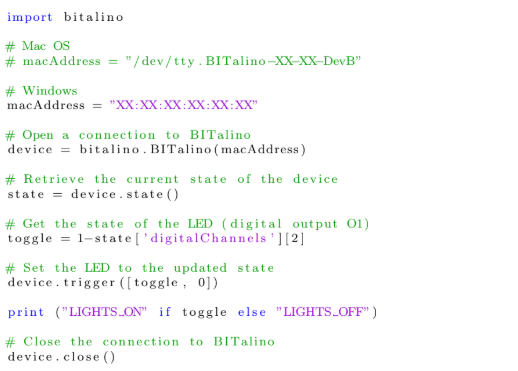    
    
    3. Run your program and verify the behaviour; whenever the program is executed, the LED should turn ON if it was turned off and turn OFF otherwise, printing the state on the console.
        BITalino LED actuator states:
                LED in the off state:
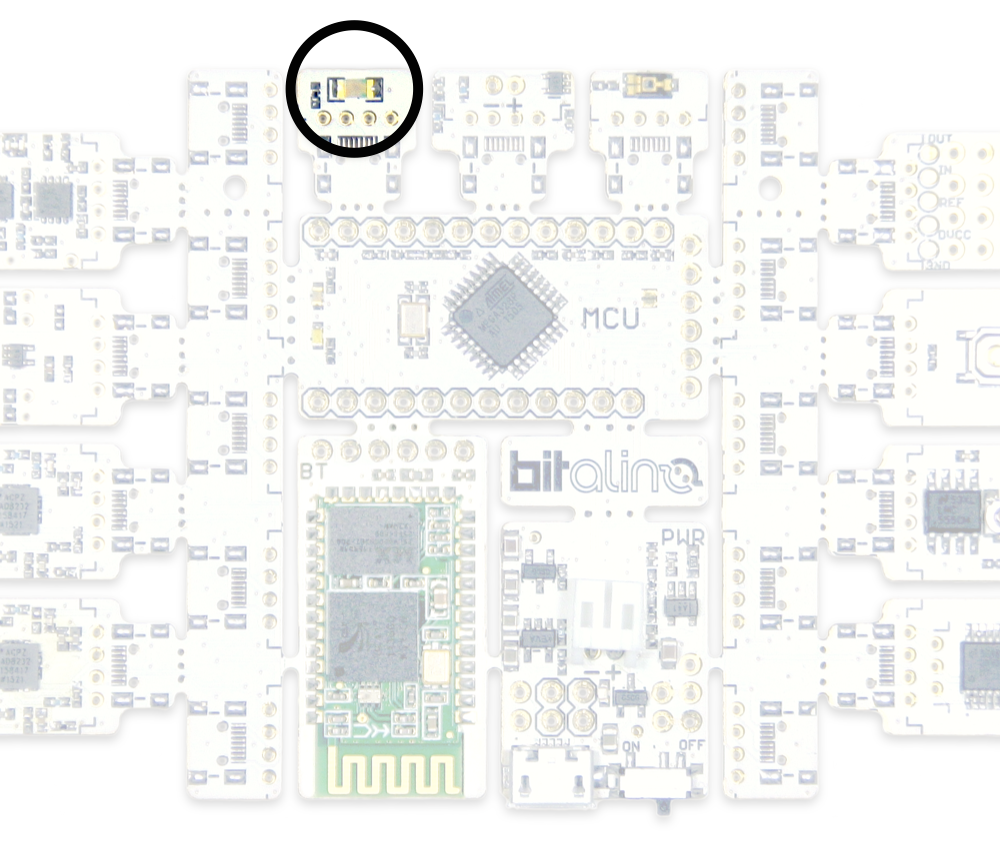 <br>

                LED in the on state:
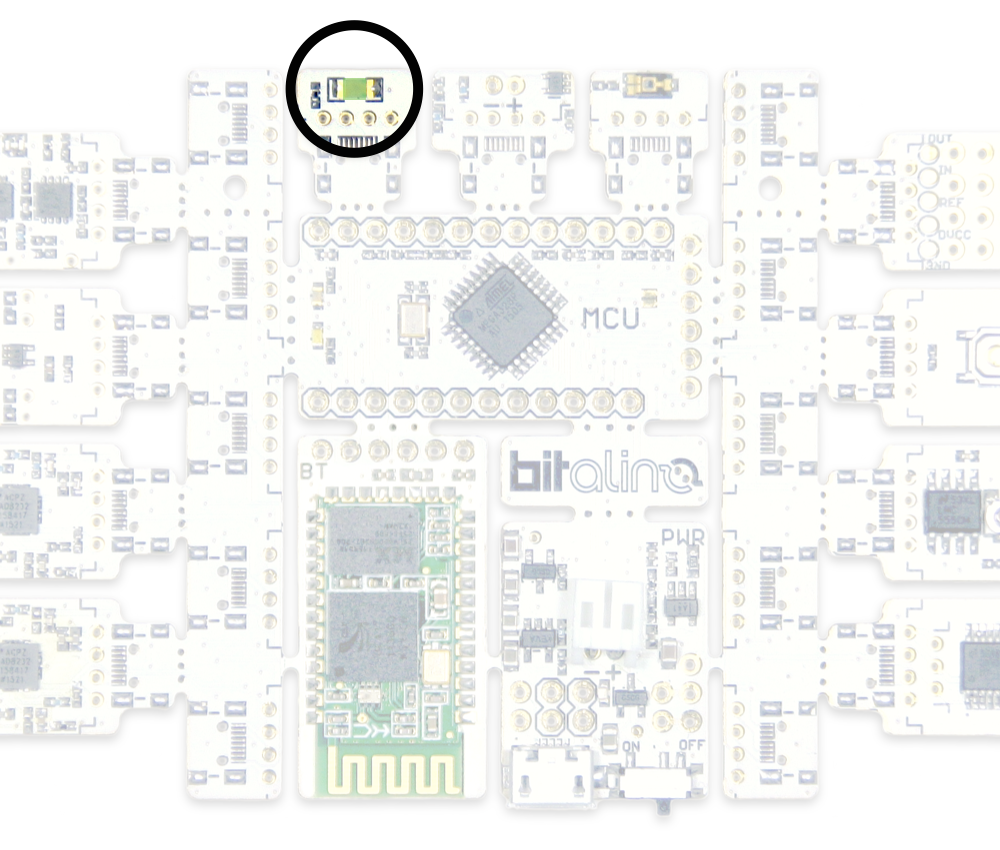 


<div style="background:#62d321;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; "> Explore </span> <br>
  <div style="background:#c5e8b0;font-size:12px"> 
    Detailed information about the state() and trigger(...) functions
can be found at:
http://bitalino.com/pyAPI/#bitalino.BITalino.state
http://bitalino.com/pyAPI/#bitalino.BITalino.trigger      
</div>

### <div style="color:#00a0e4">   3. Asynchronous Data Acquisition </div>

Combining the same principles used in the previous section with a repetition structure introduces us to a more interactive behaviour. For this experiment, we’ll implement a loop that continuously checks the state of the device and turns the LED actuator ON or OFF, based on the state of the Pushbutton (BTN) sensor.
        BITalino Pushbutton (BTN) sensor:
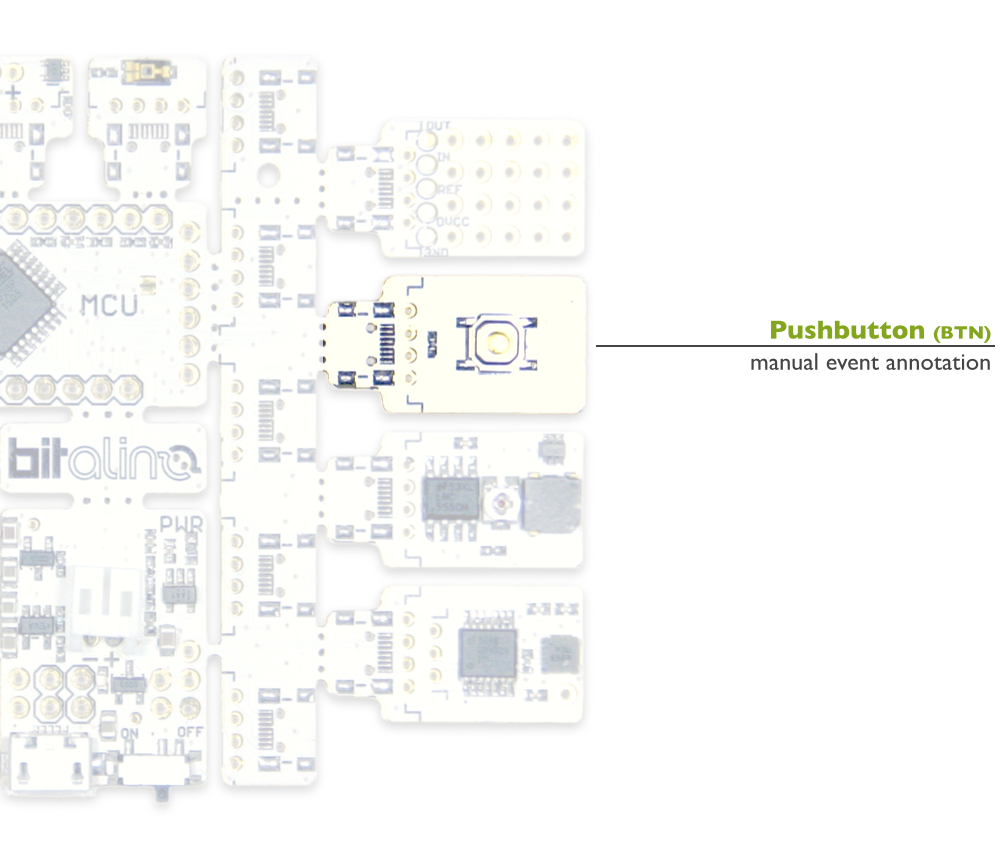

    1. Create a copy of the program developed in the previous section
    2. Add a repetition structure to your code that can enable it to continuously read the state of the device
    3. By default, the BTN sensor is connected to the BITalino digital input I1; modify your code to use this data and, depending on whether the button is pressed, make the onboard LED actuator turn ON or OFF accordingly
    4. Run your program and verify the behaviour 
    
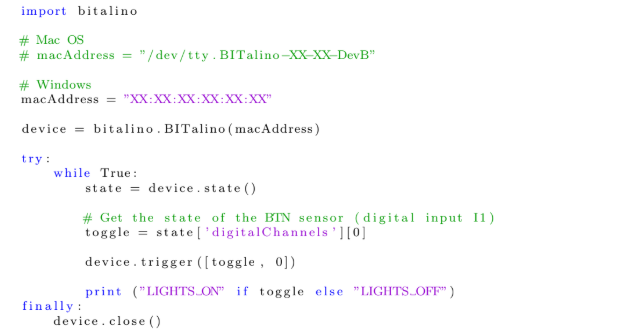

<div style="background:#00bfc2;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Note </span> <br>
  <div style="background:#9eddde;font-size:12px"> 
    Even though in this example data is being continuously acquired, as described in the Microcontroller (MCU) data sheet the device is simply replying with a single message to the periodic requests made by your program (within the repetition structure). In this mode there are no guarantees in what concerns the sampling period. The Bluetooth transmission latency (which can be up to 30 − 40 milliseconds), any other software running on your computer that slightly delays the calls to the repetition structure, and other factors alike, can all introduce a variability to the sampling period. Furthermore, BITalino does not stream its system time. This can therefore be seen as an asynchronous operation mode, in the sense that the transmitter (BITalino) and receiver (your computer) are operating with their own independent system time (aka
clocks), which is unknown amongst them.    
</div>

### <div style="color:#00a0e4">  4. Synchronous Real-time Data Acquisition  </div>

In the previous section we’ve seen how to asynchronously interface with BITalino from within a Python program. As noted, a big downside to this approach is the fact that the sampling period (i.e. time in-between readings) is variable.
Although many informal applications can cope with this operation model, for accurate digital signal processing and research use it is of utmost importance to have a known and accurate sampling period. For this reason, BITalino provides an operation mode where data is streamed at a fixed sampling rate. In this experiment we will create a panic button type of application to explore synchronous real-time communication.


    1. Create a new (empty) Python program in the Spyder IDE
    2. Copy the content of the main : block found in the bitalino.py module to your newly created Python program
    3. Modify the code in such a way that the Buzzer (BUZ) actuator is turned on whenever the Pushbutton (BTN) sensor is pressed for more than 5 seconds
            BITalino Buzzer (BUZ) actuator:
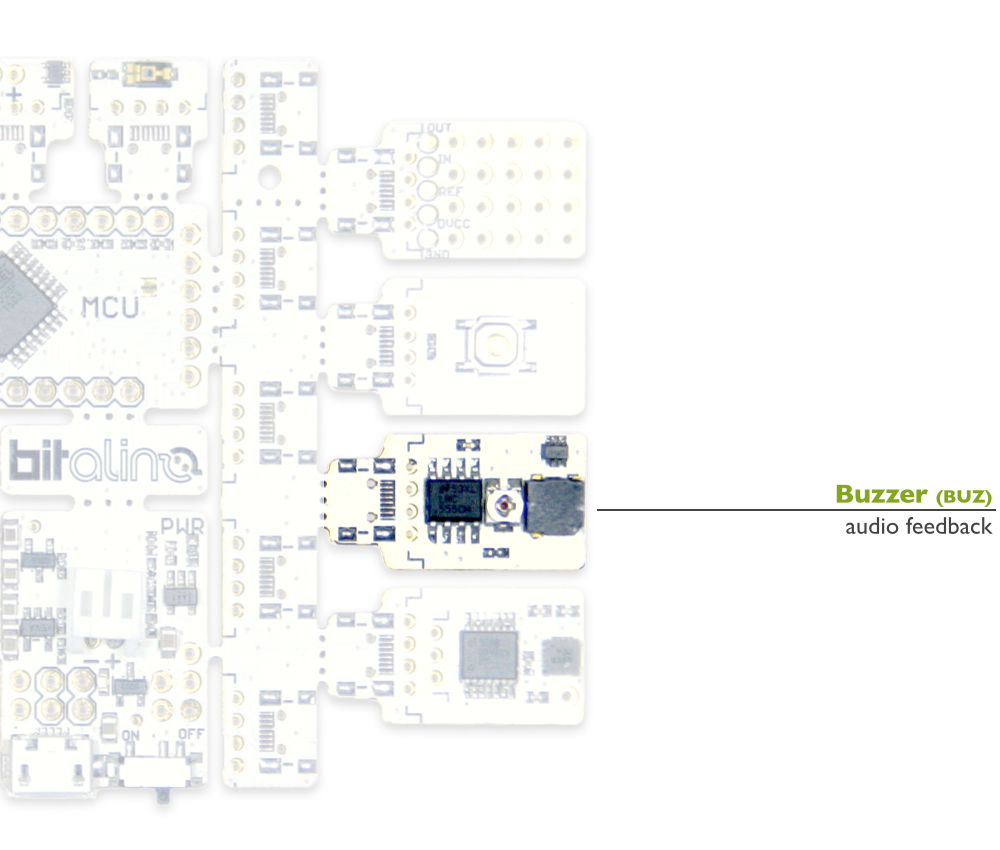

    4. Run your program and verify the behaviour.
            Example program for synchronous data acquisition with BITalino:
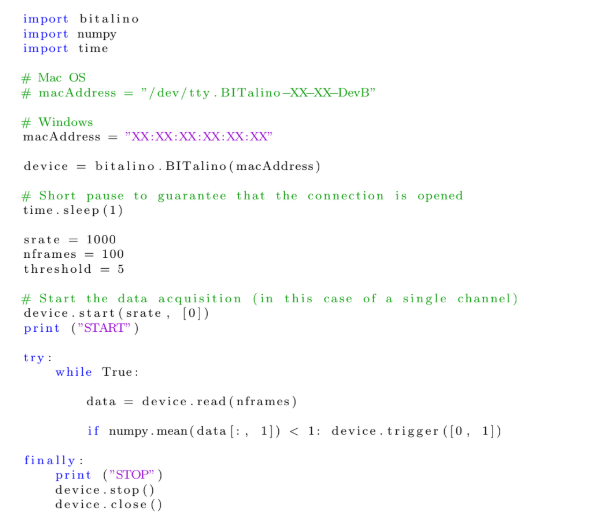
    5. As you’ve surely noticed, once the BUZ is activated there is no way of deactivating it; modify your code in such a way that the BUZ actuator is turned off if the BTN sensor is pressed again
    6. Run your program and verify the behaviour

<div style="background:#fada5e;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Warning! </span> <br>
  <div style="background:#fff3c4;font-size:12px"> 
    Synchronous data acquisition is generally a time-critical operation. In
the case of BITalino, it has a small internal buffer to accumulate samples
(roughly less than 2 seconds), reason for which if the time in-between
calls to the read(...) function is much higher than the rate at which
the device is streaming data (e.g. due to the time taken by calculations
or other operations made by your program) the internal buffer will fill
and the device will stop streaming data. A crucial component in this
process is the amount of samples acquired from the device at a time; for
additional information you can refer to:
http://forum.bitalino.com/viewtopic.php?t=129#p227
</div>

<div style="background:#62d321;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; "> Explore </span> <br>
  <div style="background:#c5e8b0;font-size:12px"> 
    Detailed information about the start(...), read(...), and stop()
functions can be found at:
http://bitalino.com/pyAPI/#bitalino.BITalino.start
http://bitalino.com/pyAPI/#bitalino.BITalino.read
http://bitalino.com/pyAPI/#bitalino.BITalino.stop      
</div>

# III. Explore
<div class='h1'  style="width:100%; background:#00a0e4;color:#282828;font-family:'arial black'; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" > </div>

### <div style="color:#00a0e4">  1. Final Notes </div>

### <div style="color:#00a0e4">  2. Quiz  </div>

    1. With your current knowledge about embedded systems and communications, describe all the actions that the BITalino firmware performs whenever you request a digital output pin to be turned on/off through the API?
    2. Create a Python program to estimate a rate of discharge of the battery, based on what you have developed for Section II.3. Describe and comment on the results.
    3. Modify the Python program you have created in Section II.4. to use the Accelerometer (ACC) signal as the control modality instead of the Push-button (BTN), simulating a use case of a simple fall detector that issues an alarm if the person is in a horizontal position.
    4. Considering that samples are being obtained at a pre-defined time interval, how many samples per second are streamed by the device if the period for obtaining each pair of samples is 0.01 seconds?
    5. When your device is streaming data at a rate of 10Hz from 6 analog input channels (4 sampled with 10-bit resolution and 2 sampled with 6-bit resolution), 2 digital input channels, 2 digital output channels and a sequence number (with 4-bit), how much space (worst case) would it take to store 10 seconds of data in a tab-delimited ASCII text file?

<div style="height:115px; background:white;border-radius:10px;text-align:center"> 

<img src="https://www.lx.it.pt/~asmc/predict/images/IT.png" alt="it" style="position: relative; margin-left: 10px; bottom:-55px;max-width:150px;height:auto;"/> 
<img src="https://cqe.tecnico.ulisboa.pt/files/files/logos/IST_A_RGB_POS.png"
         alt="alternate text" 
         style="position: relative; margin-left: 10px;  bottom:-50px; width:150px;height:auto;"/>
</div> 

<div style="width: 100%; ">
    <div style="background:#00a0e4;color:white;font-family:'arial', monospace; text-align: center; padding: 50px 0; border-radius:10px; height:10px; width:100%; float:left " >
  <span style="font-size:20px;position:relative; top:-25px">  Suggestions are welcome! </span> <br>
 <span style="font-size:12px;position:relative; top:-25px">  Please provide us your feedback at jehdwne@it.lx.pt</span> 
</div>